In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

## Import the dataset

In [29]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [30]:
import pandas as pd

# Charger les données depuis l'URL
data = pd.read_csv(filepath)

# Enregistrer les données dans un fichier CSV local
data.to_csv('medical_insurance_dataset.csv', index=False)

print("Les données ont été enregistrées dans 'medical_insurance_dataset.csv'.")

Les données ont été enregistrées dans 'medical_insurance_dataset.csv'.


In [31]:
# Afficher les premières lignes du DataFrame
df = pd.read_csv('medical_insurance_dataset.csv',header=None)
df.head()

,0,1,2,3,4,5,6
0,19,1,27.900,0,1.1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [32]:
df.columns = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1.1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


## Data Wrangling

In [33]:
df.tail(10)

,age,gender,bmi,no_of_children,smoker,region,charges
2762,21,1,32.680,2,0,1,26018.95052
2763,51,2,37.000,0,0,3,8798.59300
2764,22,1,31.020,3,1,4,35595.58980
2765,47,2,36.080,1,1,4,42211.13820
2766,18,2,23.320,1,0,4,1711.02680
2767,47,1,45.320,1,0,4,8569.86180
2768,21,1,34.600,0,0,3,2020.17700
2769,19,2,26.030,1,1,1,16450.89470
2770,23,2,18.715,0,0,1,21595.38229
2771,54,2,31.600,0,0,3,9850.43200


In [34]:
import numpy as np

# Remplacer les points d'interrogation par des NaN
df.replace('?', np.nan, inplace=True)

# Afficher les premières lignes pour vérifier
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1.1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,NaN,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [35]:
missing_values = df.isnull().sum()
print(missing_values)

age               4
gender            0
bmi               0
no_of_children    0
smoker            7
region            0
charges           0
dtype: int64


In [36]:
df.dtypes

age                object
gender              int64
bmi               float64
no_of_children      int64
smoker             object
region              int64
charges           float64
dtype: object

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [38]:
df.describe()

,gender,bmi,no_of_children,region,charges
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,1.507215,30.701349,1.101732,2.559885,13261.369959
std,0.500038,6.129449,1.214806,1.130761,12151.768945
min,1.000000,15.960000,0.000000,1.000000,1121.873900
25%,1.000000,26.220000,0.000000,2.000000,4687.797000
50%,2.000000,30.447500,1.000000,3.000000,9333.014350
75%,2.000000,34.770000,2.000000,4.000000,16577.779500
max,2.000000,53.130000,5.000000,4.000000,63770.428010


In [39]:
# Convertir la colonne 'age' en type numérique pour calculer la moyenne
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Calculer la moyenne de la colonne 'age' en ignorant les valeurs nulles
mean_age = df['age'].mean()

# Remplacer les valeurs nulles par la moyenne
df['age'].fillna(mean_age, inplace=True)

# Afficher les premières lignes pour vérifier
df.head(10)

C:\Users\yohar\AppData\Local\Temp\ipykernel_17284\3830341744.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(mean_age, inplace=True)


,age,gender,bmi,no_of_children,smoker,region,charges
0,19.0,1,27.900,0,1.1,3,16884.92400
1,18.0,2,33.770,1,0,4,1725.55230
2,28.0,2,33.000,3,0,4,4449.46200
3,33.0,2,22.705,0,0,1,21984.47061
4,32.0,2,28.880,0,0,1,3866.85520
5,31.0,1,25.740,0,NaN,4,3756.62160
6,46.0,1,33.440,1,0,4,8240.58960
7,37.0,1,27.740,3,0,1,7281.50560
8,37.0,2,29.830,2,0,2,6406.41070
9,60.0,1,25.840,0,0,1,28923.13692


In [40]:
# Trouver l'élément le plus fréquent dans la colonne 'smoker'
most_frequent_smoker = df['smoker'].mode()[0]
# Remplacer les valeurs manquantes par l'élément le plus fréquent
df['smoker'].fillna(most_frequent_smoker, inplace=True)

# Vérifier les premières lignes pour s'assurer que les valeurs manquantes ont été remplacées
df.head(10)

C:\Users\yohar\AppData\Local\Temp\ipykernel_17284\4214904051.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoker'].fillna(most_frequent_smoker, inplace=True)


,age,gender,bmi,no_of_children,smoker,region,charges
0,19.0,1,27.900,0,1.1,3,16884.92400
1,18.0,2,33.770,1,0,4,1725.55230
2,28.0,2,33.000,3,0,4,4449.46200
3,33.0,2,22.705,0,0,1,21984.47061
4,32.0,2,28.880,0,0,1,3866.85520
5,31.0,1,25.740,0,0,4,3756.62160
6,46.0,1,33.440,1,0,4,8240.58960
7,37.0,1,27.740,3,0,1,7281.50560
8,37.0,2,29.830,2,0,2,6406.41070
9,60.0,1,25.840,0,0,1,28923.13692


In [41]:
missing_values = df.isnull().sum()
print(missing_values)

age               0
gender            0
bmi               0
no_of_children    0
smoker            0
region            0
charges           0
dtype: int64


In [42]:
# Convertir les colonnes 'age' et 'smoker' en type entier
df['age'] = df['age'].astype(int)

# Nettoyer la colonne 'smoker' en convertissant les valeurs non valides en NaN, puis en les remplaçant par 0
df['smoker'] = pd.to_numeric(df['smoker'], errors='coerce').fillna(0).astype(int)

# Vérifier les types de données pour s'assurer du changement
df.dtypes


age                 int64
gender              int64
bmi               float64
no_of_children      int64
smoker              int64
region              int64
charges           float64
dtype: object

In [43]:
# Calculer la corrélation entre les colonnes numériques
correlation_matrix = df.corr()

# Afficher la corrélation entre les variables et 'charges'
correlation_with_charges = correlation_matrix['charges'].sort_values(ascending=False)
print(correlation_with_charges)

charges           1.000000
smoker            0.788783
age               0.298624
bmi               0.199846
no_of_children    0.066442
gender            0.062837
region            0.054058
Name: charges, dtype: float64


## Exploratory Data Analysis (EDA)

(0.0, 66902.8557155)

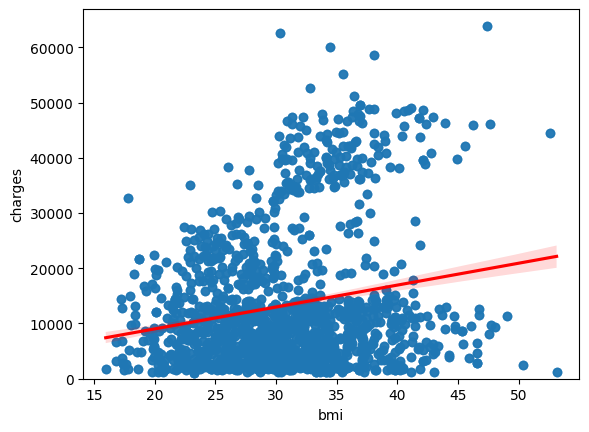

In [44]:
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

<Axes: xlabel='smoker', ylabel='charges'>

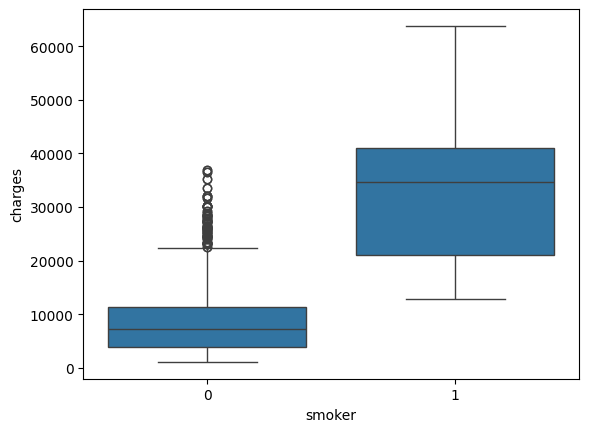

In [45]:
sns.boxplot(x="smoker", y="charges", data=df)

<Axes: xlabel='gender', ylabel='charges'>

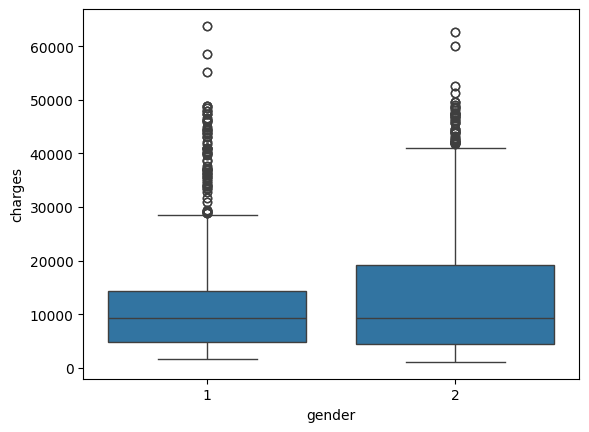

In [46]:
sns.boxplot(x="gender", y="charges", data=df)

(0.0, 66902.8557155)

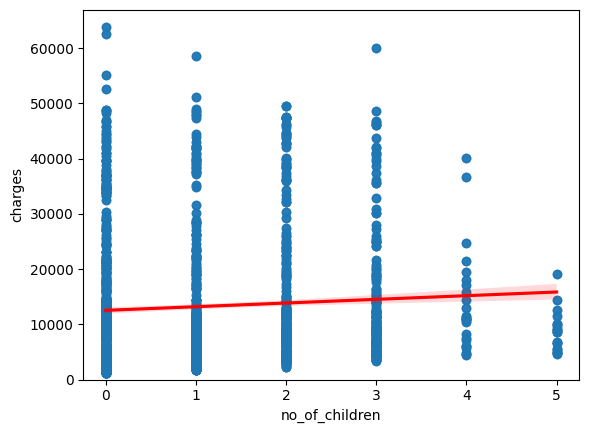

In [47]:

sns.regplot(x="no_of_children", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

In [48]:
print(df.corr())

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026046  0.113048        0.037574 -0.023286   
gender         -0.026046  1.000000  0.042924        0.016020  0.082326   
bmi             0.113048  0.042924  1.000000       -0.001492  0.011489   
no_of_children  0.037574  0.016020 -0.001492        1.000000  0.006362   
smoker         -0.023286  0.082326  0.011489        0.006362  1.000000   
region         -0.007167  0.022213  0.271119       -0.025717  0.054077   
charges         0.298624  0.062837  0.199846        0.066442  0.788783   

                  region   charges  
age            -0.007167  0.298624  
gender          0.022213  0.062837  
bmi             0.271119  0.199846  
no_of_children -0.025717  0.066442  
smoker          0.054077  0.788783  
region          1.000000  0.054058  
charges         0.054058  1.000000  


## Model Development

### Code

In [63]:
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))

0.6221791718835359


In [64]:
# definition of Y and lm remain same as used in last cell. 
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))

0.7504083816310174


In [67]:
# Y et Z utilisent les mêmes valeurs que celles définies dans les cellules précédentes
Input = [('scale', StandardScaler()),  # Étape 1 : Normalisation des données avec StandardScaler
         ('polynomial', PolynomialFeatures(include_bias=False)),  # Étape 2 : Ajout de termes polynomiaux sans biais
         ('model', LinearRegression())]  # Étape 3 : Modèle de régression linéaire

# Création d'un pipeline avec les étapes définies
pipe = Pipeline(Input)

# Conversion des données de Z en type float pour garantir la compatibilité avec les transformations
Z = Z.astype(float)

# Entraînement du pipeline sur les données Z (prédicteurs) et Y (cible)
pipe.fit(Z, Y)

# Prédiction des valeurs cibles à l'aide du pipeline
ypipe = pipe.predict(Z)

# Calcul et affichage du coefficient de détermination (R²) pour évaluer la qualité du modèle
print(r2_score(Y, ypipe))

0.8452576157336337


## Model Refinement

In [70]:
# Z and Y hold same values as in previous cells
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

In [71]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6760807753399254


In [75]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7835631069813791


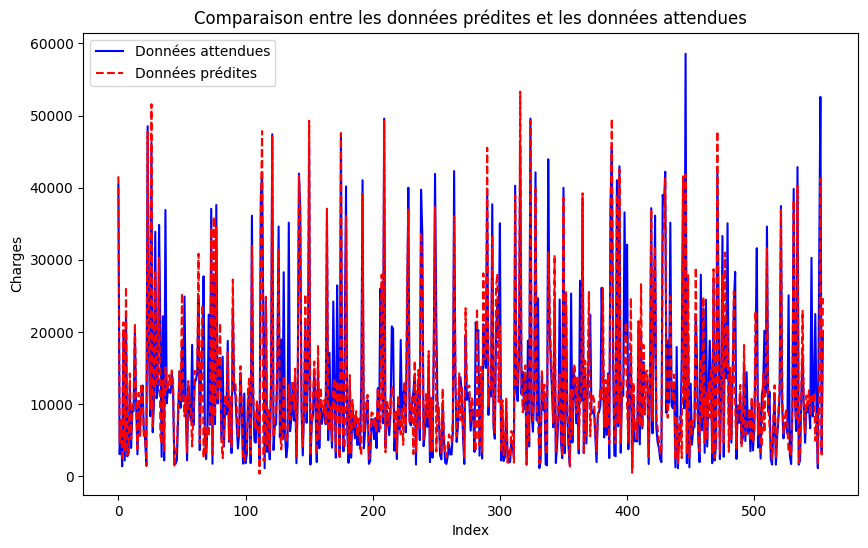

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Données attendues', color='blue')
plt.plot(y_hat, label='Données prédites', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Charges')
plt.title('Comparaison entre les données prédites et les données attendues')
plt.legend()
plt.show()

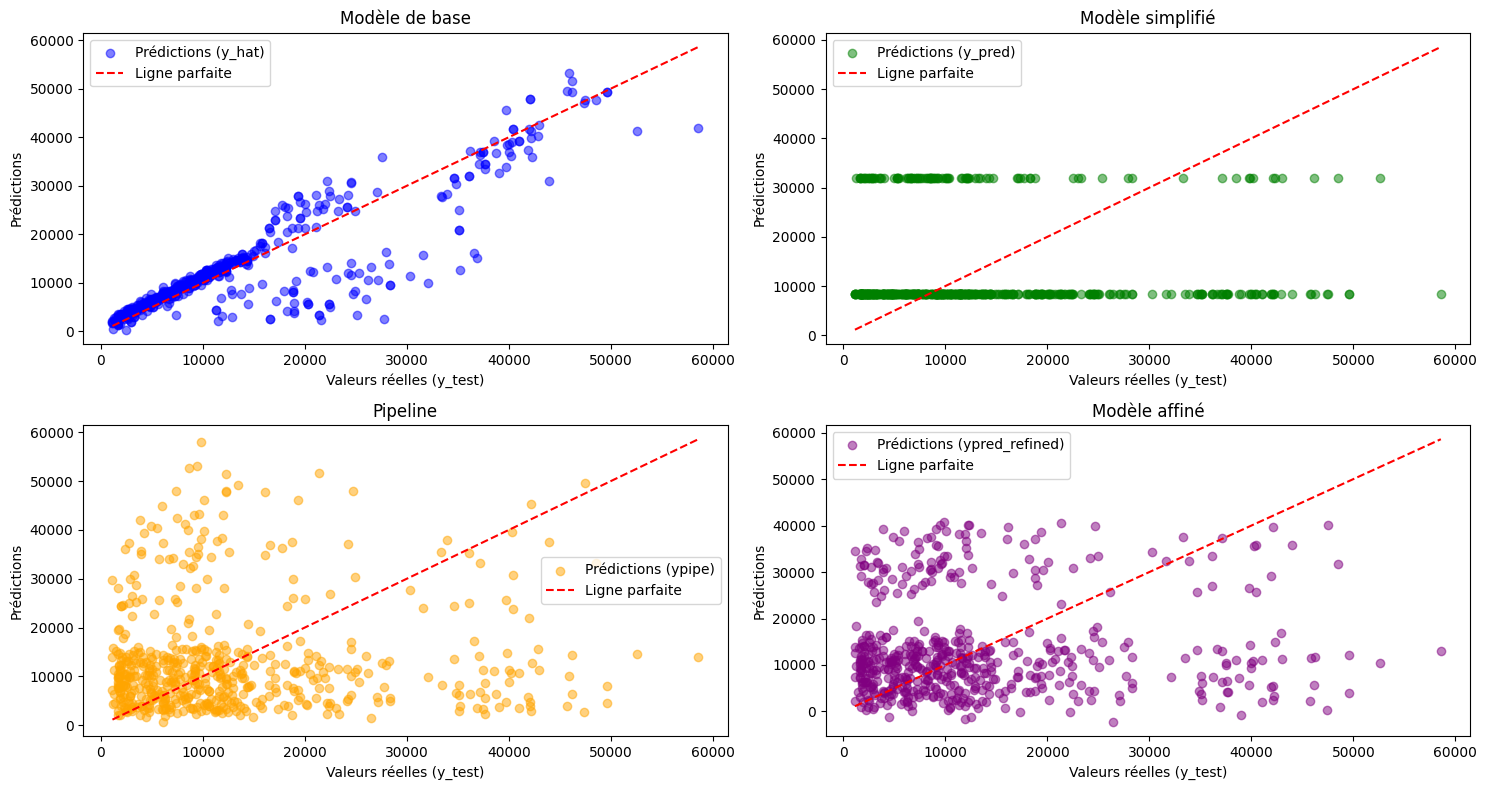

In [86]:
plt.figure(figsize=(15, 8))

# Comparaison des valeurs réelles et des prédictions du modèle de base
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_hat, alpha=0.5, color='blue', label='Prédictions (y_hat)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ligne parfaite')
plt.xlabel('Valeurs réelles (y_test)')
plt.ylabel('Prédictions')
plt.title('Modèle de base')
plt.legend()

# Comparaison des valeurs réelles et des prédictions du modèle simplifié
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5, color='green', label='Prédictions (y_pred)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ligne parfaite')
plt.xlabel('Valeurs réelles (y_test)')
plt.ylabel('Prédictions')
plt.title('Modèle simplifié')
plt.legend()

# Comparaison des valeurs réelles et des prédictions du pipeline
plt.subplot(2, 2, 3)
# Adjust ypipe to match the size of y_test
ypipe_adjusted = ypipe[:len(y_test)]
plt.scatter(y_test, ypipe_adjusted, alpha=0.5, color='orange', label='Prédictions (ypipe)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ligne parfaite')
plt.xlabel('Valeurs réelles (y_test)')
plt.ylabel('Prédictions')
plt.title('Pipeline')
plt.legend()

# Comparaison des valeurs réelles et des prédictions du modèle affiné
plt.subplot(2, 2, 4)
# Adjust ypred_refined to match the size of y_test
ypred_refined_adjusted = ypred_refined[:len(y_test)]
plt.scatter(y_test, ypred_refined_adjusted, alpha=0.5, color='purple', label='Prédictions (ypred_refined)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ligne parfaite')
plt.xlabel('Valeurs réelles (y_test)')
plt.ylabel('Prédictions')
plt.title('Modèle affiné')
plt.legend()

plt.tight_layout()
plt.show()